## Imports

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import json

from itertools import product

# Models List
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Pre-Processing
from sklearn.preprocessing import LabelEncoder
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Constants
RANDOM_SEED = 42
NUM_FOLDS = 8

## Loading Data
Let's load the data

In [ ]:
df = pd.read_csv("../Data/experiment_with_lat_and_lng.csv") 
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS,lat,lng
21,3,DYKER HEIGHTS,02 TWO FAMILY DWELLINGS,1,6268,63,B1,1333 80TH STREET,11228.0,2.0,...,1748.0,1930.0,1,B1,1220000,2019-02-13,brooklyn,1333 80TH STREET NYC,40.617037,-74.009390
91,2,MORRISANIA/LONGWOOD,02 TWO FAMILY DWELLINGS,1,2972,2,B1,1296 CHISHOLM STREET,10459.0,2.0,...,2274.0,2007.0,1,B1,498000,2019-03-22,bronx,1296 CHISHOLM STREET NYC,40.830226,-73.895369
77,3,MARINE PARK,02 TWO FAMILY DWELLINGS,1,7885,136,B9,1717 EAST 38TH STREET,11234.0,2.0,...,2148.0,1955.0,1,B9,805000,2019-08-15,brooklyn,1717 EAST 38TH STREET NYC,40.615329,-73.934685
42,4,JAMAICA ESTATES,01 ONE FAMILY DWELLINGS,1,7231,99,A2,180-24 80TH DRIVE,11432.0,1.0,...,880.0,1945.0,1,A2,998000,2019-01-03,queens,180-24 80TH DRIVE NYC,40.725384,-73.786601
2,4,BAYSIDE,02 TWO FAMILY DWELLINGS,1,5952,20,B2,215-29 23RD ROAD,11360.0,2.0,...,3078.0,1970.0,1,B2,800000,2019-07-05,queens,215-29 23RD ROAD NYC,40.782845,-73.774405


## Pre-Processing - DELETE THIS !!!!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BOROUGH                                98 non-null     int64  
 1   NEIGHBORHOOD                           98 non-null     object 
 2   BUILDING CLASS CATEGORY                98 non-null     object 
 3   TAX CLASS AS OF FINAL ROLL 18/19       98 non-null     object 
 4   BLOCK                                  98 non-null     int64  
 5   LOT                                    98 non-null     int64  
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  98 non-null     object 
 7   ADDRESS                                98 non-null     object 
 8   ZIP CODE                               98 non-null     float64
 9   RESIDENTIAL UNITS                      98 non-null     float64
 10  COMMERCIAL UNITS                       98 non-null     float64
 11  TOTAL UN

In [ ]:
LABELS_TO_DROP = ["ADDRESS", "FINAL_ADDRESS", "AREA"]

df.drop(labels=LABELS_TO_DROP, axis="columns", inplace=True)
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,lat,lng
16,5,HUGUENOT,01 ONE FAMILY DWELLINGS,1,6335,63,A2,10312.0,1.0,0.0,1.0,4000.0,1975.0,1970.0,1,A2,702500,2019-10-18,40.538336,-74.193780
44,4,FAR ROCKAWAY,02 TWO FAMILY DWELLINGS,1,15793,50,B2,11691.0,2.0,0.0,2.0,2786.0,2976.0,2018.0,1,B2,756000,2019-12-30,40.597957,-73.762232
15,3,MANHATTAN BEACH,01 ONE FAMILY DWELLINGS,1,8730,57,A1,11235.0,1.0,0.0,1.0,3600.0,1342.0,1940.0,1,A1,1385000,2019-11-01,40.581198,-73.949277
4,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,759,10,C0,11105.0,3.0,0.0,3.0,3000.0,2740.0,1965.0,1,C0,1425000,2019-04-04,40.768648,-73.902715
87,5,DONGAN HILLS,02 TWO FAMILY DWELLINGS,1,3291,74,B9,10304.0,2.0,0.0,2.0,2860.0,1450.0,1980.0,1,B9,618000,2019-11-22,40.594115,-74.094336


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BOROUGH                                98 non-null     int64  
 1   NEIGHBORHOOD                           98 non-null     object 
 2   BUILDING CLASS CATEGORY                98 non-null     object 
 3   TAX CLASS AS OF FINAL ROLL 18/19       98 non-null     object 
 4   BLOCK                                  98 non-null     int64  
 5   LOT                                    98 non-null     int64  
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  98 non-null     object 
 7   ZIP CODE                               98 non-null     float64
 8   RESIDENTIAL UNITS                      98 non-null     float64
 9   COMMERCIAL UNITS                       98 non-null     float64
 10  TOTAL UNITS                            98 non-null     float64
 11  LAND SQU

In [ ]:
for object_type_data in df.select_dtypes(include='object'):
    lb=LabelEncoder()
    df[object_type_data]=lb.fit_transform(df[object_type_data].values)
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,lat,lng
72,2,61,1,0,5518,5,5,10465.0,2.0,0.0,2.0,3739.0,2971.0,2004.0,1,5,860000,44,40.820698,-73.810643
20,2,55,1,0,3555,45,5,10473.0,2.0,0.0,2.0,2500.0,3620.0,1940.0,1,5,725000,17,40.818169,-73.865218
16,5,30,0,0,6335,63,2,10312.0,1.0,0.0,1.0,4000.0,1975.0,1970.0,1,2,702500,66,40.538336,-74.193780
61,4,51,0,0,3162,36,3,11375.0,1.0,0.0,1.0,1764.0,1440.0,1945.0,1,3,773000,3,40.720139,-73.855827
32,4,11,1,0,4130,46,6,11356.0,2.0,0.0,2.0,1157.0,1600.0,1925.0,1,6,600000,57,40.781835,-73.843777


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BOROUGH                                98 non-null     int64  
 1   NEIGHBORHOOD                           98 non-null     int32  
 2   BUILDING CLASS CATEGORY                98 non-null     int32  
 3   TAX CLASS AS OF FINAL ROLL 18/19       98 non-null     int32  
 4   BLOCK                                  98 non-null     int64  
 5   LOT                                    98 non-null     int64  
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  98 non-null     int32  
 7   ZIP CODE                               98 non-null     float64
 8   RESIDENTIAL UNITS                      98 non-null     float64
 9   COMMERCIAL UNITS                       98 non-null     float64
 10  TOTAL UNITS                            98 non-null     float64
 11  LAND SQU

In [ ]:
cat_columns = df.select_dtypes(include=['int64','int32']).columns
print(cat_columns)
for curr_column in cat_columns:
    print("{} column distribution:".format(curr_column))
    print(df[curr_column].value_counts())
    print()

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK', 'LOT',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')
BOROUGH column distribution:
4    35
3    33
5    17
2    13
Name: BOROUGH, dtype: int64

NEIGHBORHOOD column distribution:
19    4
14    3
4     3
48    3
9     3
     ..
66    1
32    1
31    1
30    1
0     1
Name: NEIGHBORHOOD, Length: 68, dtype: int64

BUILDING CLASS CATEGORY column distribution:
0    49
1    38
2     9
4     1
3     1
Name: BUILDING CLASS CATEGORY, dtype: int64

TAX CLASS AS OF FINAL ROLL 18/19 column distribution:
0    96
1     2
Name: TAX CLASS AS OF FINAL ROLL 18/19, dtype: int64

BLOCK column distribution:
12064    2
8304     1
3493     1
9000     1
3369     1
        ..
3291     1
1116     1
4957     1
4958     1
12548    1
Name: BLOCK, Length: 97, dtype: int64

LOT column di

## Models

In [ ]:
# split the data into train and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)

train_y = train_df['SALE PRICE']
# train_log_y = np.log(train_y)
train_x = train_df.drop(['SALE PRICE'], axis=1)

test_y = test_df['SALE PRICE']
# test_log_y = np.log(test_y)
test_x = test_df.drop(['SALE PRICE'], axis=1)

## Plotting functions defenitions

In [ ]:
def plot_predicted_vs_real(predicted_y, real_y,title="Predicted vs. Real Sale Price"):
    """
    predicted_y: The predicted target Series as gained from model.predict()
    real_y: The actual target Series
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(real_y, predicted_y)
    x , y = list(range(min(real_y), max(real_y))), list(range(min(real_y), max(real_y)))
    plt.scatter(x,y)
    std = real_y.std()
    plt.fill_between(x, y + std, y - std, facecolor='r', alpha=0.1)
    plt.title(title)
    plt.xlabel("Real Price")
    plt.ylabel("Predicted Price")
    plt.show()

In [ ]:
def plot_vs_map(test_x, predicted_y, real_y, path_to_map="../Images/nyc_map1.png", border_box=[-74.212974, -73.73724190000001, 40.520321200000005, 40.8979809], title='Plotting Spatial Data on New-York map'):
    """
    """
    # Get the points whos error is less then the mse
    std = real_y.std()
    mean = real_y.std()
    less_then_std = test_x[(predicted_y > real_y - std) & (predicted_y < real_y + std)]
    more_then_std = test_x[~((predicted_y > real_y -std) & (predicted_y < real_y + std))]
    # Plot the map
    ruh_m = plt.imread(path_to_map)
    fig, ax = plt.subplots(figsize = (8,7))
    # Print good points
    ax.scatter(less_then_std.lng, less_then_std.lat, zorder=1, alpha= 0.4, c='b', s=30)
    # Print Bad points
    ax.scatter(more_then_std.lng, more_then_std.lat, zorder=1, alpha= 0.4, c='r', s=30)

    ax.set_title(title)
    ax.set_xlim(border_box[0],border_box[1])
    ax.set_ylim(border_box[2],border_box[3])
    ax.imshow(ruh_m, zorder=0, extent = border_box, aspect= 'equal')

## Evaluation Function

In [ ]:
def hyper_parameter_evaluation(model, tuned_parameters, X_train, y_train, X_test, y_test, n_folds):
    """
    tuned_parameters = [{'n_estimators': [50,100,500], 'max_depth': [10, 50, 100]}]
    """
    scores = ['neg_mean_squared_log_error','r2']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(model, tuned_parameters, scoring=score, cv=n_folds)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

In [ ]:
def model_evaluation(model, model_name,X_train, Y_train, X_test, Y_test, n_folds=NUM_FOLDS):
    model.fit(X_train, Y_train)
    score = cross_val_score(model, X_train, Y_train, cv=n_folds, scoring="neg_mean_squared_log_error")
    r2_score = cross_val_score(model, X_train, Y_train, cv=n_folds, scoring="r2")

    avg_neg_msle = sum(score)/ len(score)
    avg_r2 = sum(r2_score)/ len(r2_score)
    print(f"{model_name} Negative Mean Squarred Log Error is:{avg_neg_msle}\n"
          f"{model_name} R2 Score is:{avg_r2}\n"
          f"Result is calculated using {n_folds}-cross-validation")
    
    Y_predicted = model.predict(X_test)
    plot_predicted_vs_real(Y_predicted, Y_test, title=f"{model_name} Predicted vs Real")
    with open("../Images/nyc_map1.json") as file:
        border_box = json.load(file)
    plot_vs_map(X_test, Y_predicted, Y_test, path_to_map="../Images/nyc_map1.png", border_box=border_box, title=f"{model_name} errors on map")


## Dummy Regression - Mean

Dummy Mean Regresson Negative Mean Squarred Log Error is:-0.15740652880355752
Dummy Mean Regresson R2 Score is:-0.12206908028866909
Result is calculated using 8-cross-validation


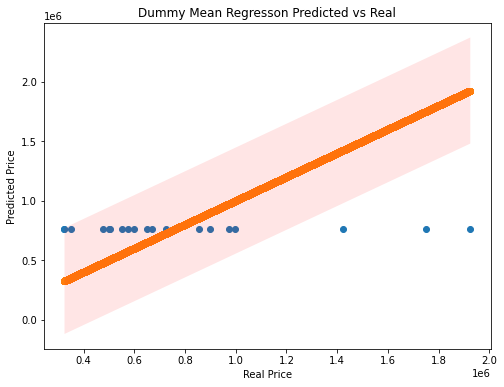

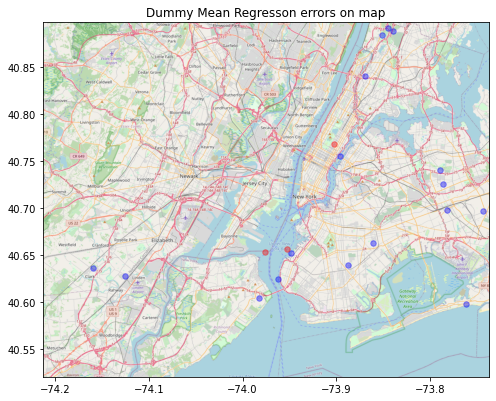

In [ ]:
from sklearn.model_selection import cross_val_score
dummy_mean_regression = DummyRegressor(strategy="mean")
model_evaluation(dummy_mean_regression, "Dummy Mean Regresson", train_x, train_y, test_x, test_y)

## Dummy Median Regression

Dummy Median Regresson Negative Mean Squarred Log Error is:-0.1529251761269761
Dummy Median Regresson R2 Score is:-0.13171762068790815
Result is calculated using 8-cross-validation


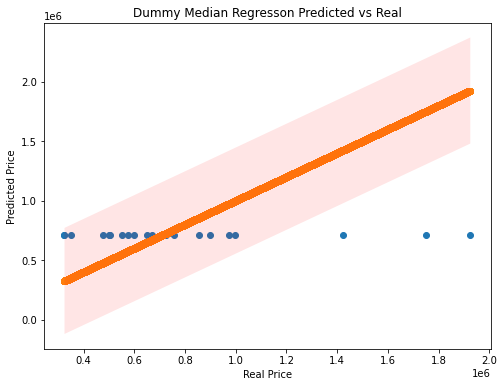

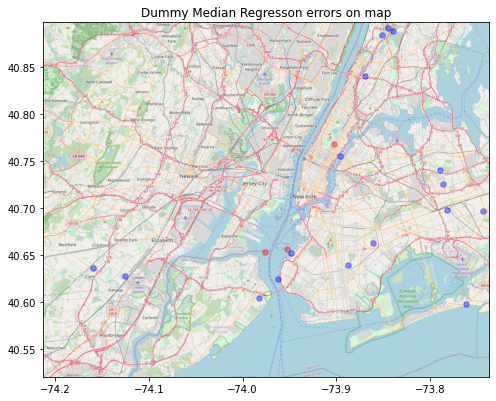

In [ ]:
dummy_median_regression = DummyRegressor(strategy="median")
model_evaluation(dummy_median_regression, "Dummy Median Regresson", train_x, train_y, test_x, test_y)

## KNN Regression

# Tuning hyper-parameters for neg_mean_squared_log_error

Best parameters set found on development set:

{'metric': 'manhattan', 'n_neighbors': 5}

Grid scores on development set:

-0.164 (+/-0.130) for {'metric': 'minkowski', 'n_neighbors': 1}
-0.128 (+/-0.095) for {'metric': 'minkowski', 'n_neighbors': 3}
-0.113 (+/-0.075) for {'metric': 'minkowski', 'n_neighbors': 5}
-0.111 (+/-0.046) for {'metric': 'minkowski', 'n_neighbors': 7}
-0.107 (+/-0.060) for {'metric': 'minkowski', 'n_neighbors': 9}
-0.115 (+/-0.077) for {'metric': 'minkowski', 'n_neighbors': 11}
-0.164 (+/-0.130) for {'metric': 'euclidean', 'n_neighbors': 1}
-0.128 (+/-0.095) for {'metric': 'euclidean', 'n_neighbors': 3}
-0.113 (+/-0.075) for {'metric': 'euclidean', 'n_neighbors': 5}
-0.111 (+/-0.046) for {'metric': 'euclidean', 'n_neighbors': 7}
-0.107 (+/-0.060) for {'metric': 'euclidean', 'n_neighbors': 9}
-0.115 (+/-0.077) for {'metric': 'euclidean', 'n_neighbors': 11}
-0.155 (+/-0.129) for {'metric': 'manhattan', 'n_

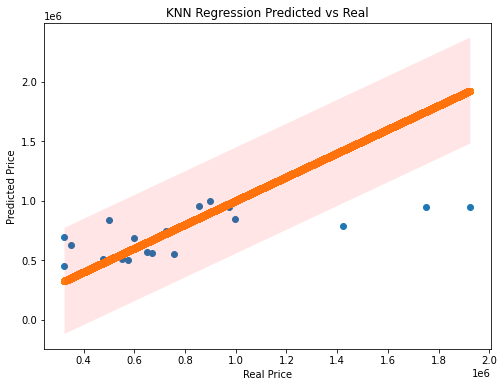

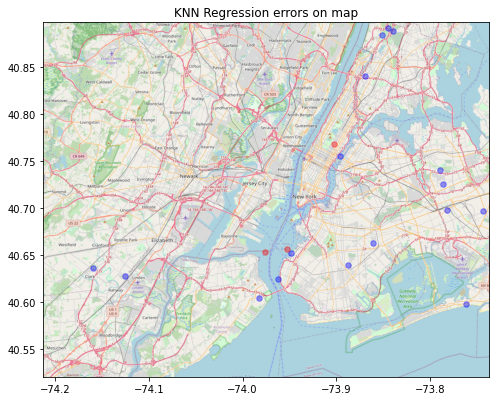

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

tuned_parameters = [{'n_neighbors': [1,3,5,7,9,11], 'metric': ['minkowski', 'euclidean', 'manhattan']}]

hyper_parameter_evaluation(KNeighborsRegressor(), tuned_parameters, train_x.filter(items=['lat','lng']), train_y, test_x.filter(items=['lat','lng']), test_y, NUM_FOLDS)

knn_regression = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
model_evaluation(knn_regression, "KNN Regression", train_x.filter(items=['lat','lng']), train_y, test_x.filter(items=['lat','lng']), test_y)

## Linear Regression

Linear Regression Negative Mean Squarred Log Error is:-0.08718758712573768
Linear Regression R2 Score is:0.44125087629634985
Result is calculated using 8-cross-validation


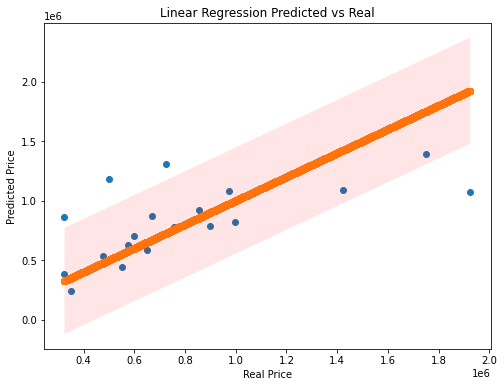

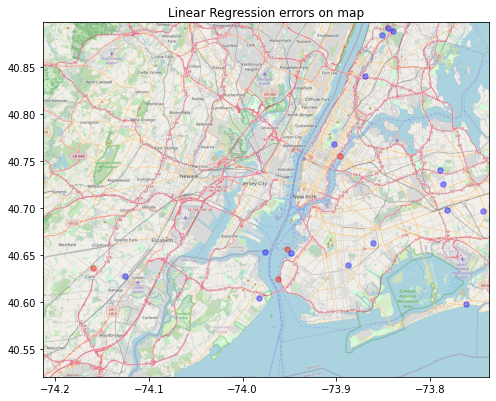

In [ ]:
linear_regression = LinearRegression(n_jobs=len(df), normalize=True)
model_evaluation(linear_regression, "Linear Regression", train_x, train_y, test_x, test_y)

## Random Forest Regressor

In [ ]:
tuned_parameters = [{'n_estimators': [50,100,500], 'max_depth': [10, 50, 100]}]

hyper_parameter_evaluation(RandomForestRegressor(), tuned_parameters, train_x, train_y, test_x, test_y, NUM_FOLDS)


# Tuning hyper-parameters for neg_mean_squared_log_error

Best parameters set found on development set:

{'max_depth': 100, 'n_estimators': 100}

Grid scores on development set:

-0.081 (+/-0.072) for {'max_depth': 10, 'n_estimators': 50}
-0.079 (+/-0.064) for {'max_depth': 10, 'n_estimators': 100}
-0.077 (+/-0.059) for {'max_depth': 10, 'n_estimators': 500}
-0.078 (+/-0.061) for {'max_depth': 50, 'n_estimators': 50}
-0.079 (+/-0.065) for {'max_depth': 50, 'n_estimators': 100}
-0.076 (+/-0.062) for {'max_depth': 50, 'n_estimators': 500}
-0.075 (+/-0.058) for {'max_depth': 100, 'n_estimators': 50}
-0.073 (+/-0.052) for {'max_depth': 100, 'n_estimators': 100}
-0.076 (+/-0.057) for {'max_depth': 100, 'n_estimators': 500}

# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'max_depth': 100, 'n_estimators': 100}

Grid scores on development set:

0.415 (+/-0.375) for {'max_depth': 10, 'n_estimators': 50}
0.398 (+/-0.356) for {'max_depth': 10, 'n_estimators': 10

Random Forest Regression Negative Mean Squarred Log Error is:-0.07687994249503438
Random Forest Regression R2 Score is:0.4119335485354832
Result is calculated using 8-cross-validation


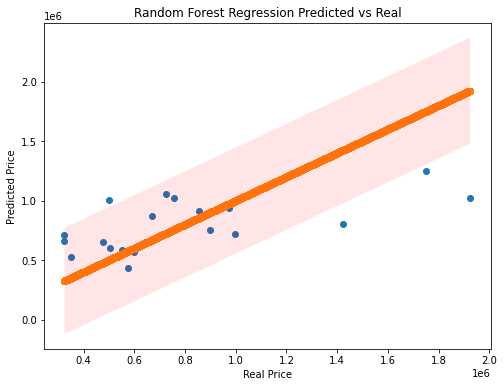

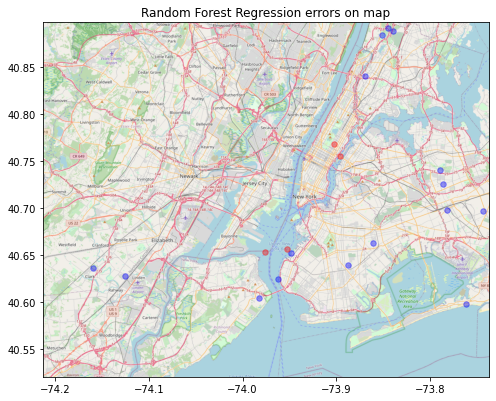

In [ ]:
random_forest_regression = RandomForestRegressor(max_depth=50, n_estimators=500, criterion="mse", n_jobs=32, random_state=RANDOM_SEED)
model_evaluation(random_forest_regression, "Random Forest Regression", train_x, train_y, test_x, test_y)

## Multi Layered Perceptron Regressor

In [ ]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'hidden_layer_sizes': [(128,),(128,256,),(128,256,512,)],
                     'activation': ["relu"],
                     'max_iter': [int(1e2), int(1e3), int(1e4)]
                    }]

hyper_parameter_evaluation(MLPRegressor(), tuned_parameters, train_x, train_y, test_x, test_y, NUM_FOLDS)


# Tuning hyper-parameters for neg_mean_squared_log_error

Best parameters set found on development set:

{'activation': 'relu', 'hidden_layer_sizes': (128,), 'max_iter': 10000}

Grid scores on development set:

-8.803 (+/-1.387) for {'activation': 'relu', 'hidden_layer_sizes': (128,), 'max_iter': 100}
-0.140 (+/-0.090) for {'activation': 'relu', 'hidden_layer_sizes': (128,), 'max_iter': 1000}
-0.095 (+/-0.111) for {'activation': 'relu', 'hidden_layer_sizes': (128,), 'max_iter': 10000}
-0.152 (+/-0.098) for {'activation': 'relu', 'hidden_layer_sizes': (128, 256), 'max_iter': 100}
-0.164 (+/-0.108) for {'activation': 'relu', 'hidden_layer_sizes': (128, 256), 'max_iter': 1000}
-0.164 (+/-0.103) for {'activation': 'relu', 'hidden_layer_sizes': (128, 256), 'max_iter': 10000}
-0.176 (+/-0.123) for {'activation': 'relu', 'hidden_layer_sizes': (128, 256, 512), 'max_iter': 100}
-0.171 (+/-0.109) for {'activation': 'relu', 'hidden_layer_sizes': (128, 256, 512), 'max_iter': 1000}
-0.173 (+/-0.130

MLPR Negative Mean Squarred Log Error is:-0.10030714030873887
MLPR R2 Score is:0.22259033482116097
Result is calculated using 8-cross-validation


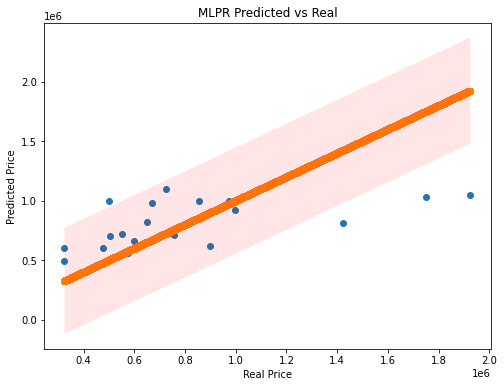

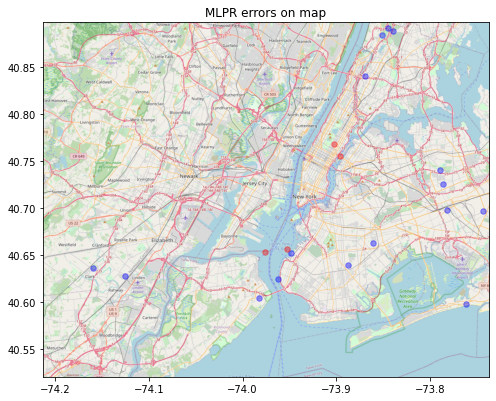

In [ ]:
# MLP constants
HIDDEN_LAYER_SIZES = (128,)
ACTIVATION_FUNCTION = "relu"
MAX_ITERATIONS = int(1e4)
mlp_regression = MLPRegressor(hidden_layer_sizes=HIDDEN_LAYER_SIZES, activation=ACTIVATION_FUNCTION, max_iter=MAX_ITERATIONS, random_state=RANDOM_SEED)
model_evaluation(mlp_regression, "MLPR", train_x, train_y, test_x, test_y)